# Importing necessary libraries

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data set

In [ ]:
melb_data = pd.read_csv("melb_data.csv")

In [80]:
melb_data

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_t,Type_u
0,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,202.0,126.0,1970.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,0,0
1,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,0,0
2,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,0,0
3,Abbotsford,40 Federation La,3,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,94.0,126.0,1970.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,0,0
4,Abbotsford,55a Park St,4,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12208,Williamstown,87 Pasco St,3,1285000.0,S,Jas,29/07/2017,6.8,3016.0,3.0,...,296.0,126.0,1970.0,Hobsons Bay,-37.86335,144.89487,Western Metropolitan,6380.0,0,0
12209,Windsor,201/152 Peel St,2,560000.0,PI,hockingstuart,29/07/2017,4.6,3181.0,2.0,...,0.0,61.6,2012.0,Stonnington,-37.85581,144.99025,Southern Metropolitan,4380.0,0,1
12210,Wollert,60 Saltlake Bvd,3,525300.0,S,Stockdale,29/07/2017,25.5,3750.0,3.0,...,400.0,126.0,1970.0,Whittlesea,-37.61387,145.03850,Northern Metropolitan,2940.0,0,0
12211,Yarraville,2 Adeney St,2,750000.0,SP,hockingstuart,29/07/2017,6.3,3013.0,2.0,...,269.0,126.0,1970.0,Maribyrnong,-37.81649,144.86731,Western Metropolitan,6543.0,0,0


# Iniatial data exploration

In [61]:
melb_data.head()

,Suburb,Address,Rooms,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Type_t,Type_u
0,Abbotsford,85 Turner St,2,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,...,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,0,0
1,Abbotsford,25 Bloomburg St,2,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,0,0
2,Abbotsford,5 Charles St,3,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,0,0
3,Abbotsford,40 Federation La,3,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,...,94.0,126.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,0,0
4,Abbotsford,55a Park St,4,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,0,0


In [25]:
# to check data type and some extra info

melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [63]:
melb_data.shape

(12211, 22)

# Data cleaning process

In [64]:
# Step 1: Drop rows where 'Price' is missing

melb_data = melb_data.dropna(subset=['Price'])

In [65]:
# Step 2: Handle missing values in other columns
# Fill missing values with median for numerical columns

numerical_cols = melb_data.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_cols:
    if melb_data[column].isnull().sum() > 0:
        melb_data[column] = melb_data[column].fillna(melb_data[column].median())

In [66]:
# Step 3: Drop any remaining rows with missing values

melb_data = melb_data.dropna()

In [67]:
# feature enginnering
# Step 4: Convert categorical variables to numerical (if any)
# Example: Convert 'Type' column to dummy variables (one-hot encoding)

if 'Type' in melb_data.columns:
    melb_data = pd.get_dummies(melb_data, columns=['Type'], drop_first=True)

# Select predictors and target (dependent and independent variable)

In [68]:
y = melb_data.Price
features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude','Distance' ]
X = melb_data[features]

# Train-Test Split
Split the data into training and validation sets.

In [69]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=1)

# Fitting the model

In [81]:
# Define and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=1)
model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

# Making prediction

In [73]:
val_predictions = model.predict(val_X)
val_predictions

array([ 772210. ,  606365. ,  983325. , ..., 2958730. , 1289667.5,
       1010800. ])

# Evaluate the model

In [72]:
mae = mean_absolute_error(val_y, val_predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 171354.21457140258


# Model Training with Hyperparameters

In [ ]:
# model fine tuning with hyperparameters 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=1),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(train_X, train_y)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


In [75]:
val_predictions = best_model.predict(val_X)
val_predictions

array([1018958.32      ,  610327.5       , 1013277.5       , ...,
       3002520.        , 1228432.08333333,  939610.83      ])

# Evaluate the model after tuning


In [76]:
mae = mean_absolute_error(val_y, val_predictions)
mse = mean_squared_error(val_y, val_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(val_y, val_predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Absolute Error: 168013.28875181227
Mean Squared Error: 78623099553.62773
Root Mean Squared Error: 280398.1090407489
R^2 Score: 0.8013582873999183


After applying hyperparameters and fine-tuning the model, the Mean Absolute Error (MAE) improved from 171,354.21 to 168,013.29. Additionally, the model achieved a Mean Squared Error (MSE) of 78,623,099,553.63, a Root Mean Squared Error (RMSE) of 280,398.11, and an R^2 Score of 0.8014, indicating a better fit and improved predictive performance.

# Visualize actual vs predicted prices

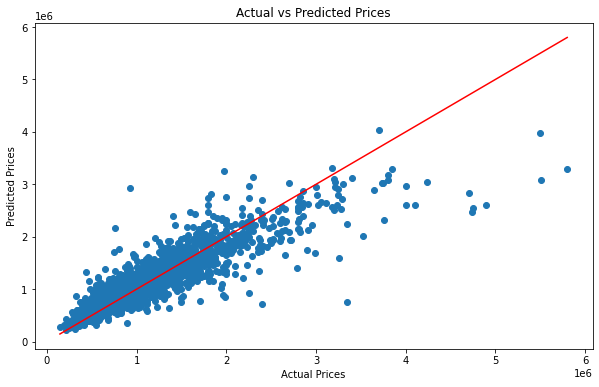

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(val_y, val_predictions)
plt.plot([min(val_y), max(val_y)], [min(val_y), max(val_y)], color='red')  # Line y=x
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()